# Python app for Werner states

In [1]:
from myPackage.my_module import *

np.set_printoptions(precision=5,suppress=True)


pio4=density_matrix(rho2(pi/4,1), 'pio4')
pio2=density_matrix(rho2(pi/2,1), 'pio2')
pio3=density_matrix(rho2(pi/3,1), 'pio3')
pio6=density_matrix(rho2(pi/6,1), 'pio6')
pio5=density_matrix(rho2(pi/5,1), 'pio5')
pio1=density_matrix(rho2(pi,1), 'pio1')
pio4v05=density_matrix(rho2(pi/4,1/2))
pio2v05=density_matrix(rho2(pi/2,1/2))
pio3v05=density_matrix(rho2(pi/3,1/2))
pio6v05=density_matrix(rho2(pi/6,1/2))
pio5v05=density_matrix(rho2(pi/5,1/2))
noise=density_matrix(np.identity(4)/4)
rand_state=density_matrix([[0.27787, 0.14449, 0.2125 , 0.19819],
        [0.14449, 0.23208, 0.18863, 0.0477 ],
        [0.2125 , 0.18863, 0.31998, 0.12641],
        [0.19819, 0.0477 , 0.12641, 0.17006]], 'rand_state')

states = [pio1, pio2, pio3, pio4, pio5, pio6, rand_state]

for state in states:
        state.data = np.array(np.load('statesData/'+str(state)+'.npy'))

## Important functions

Basic class
**Density_matrix**
- to initiallize, pass 4x4 ndarray (density matrix)
- attributes
    - `data` - array of observation outcomes (real number [0,1] representing the probability of being found in 00 state after rotating by some random unitary matrix)
    - `matrix` - 4x4 ndarray density matrix 
- methods
    - `set(N=50000)` puts density matrix to N observations and saves the outcomes to `data` attribute
    - `range()` - returns minimum and maximum outcome
    - `histogram(BinNum=100)` - creates a histogram with `BinNum` bins
    - `bins(BinNum=100)` - creates a dictionary with `bins` representing boundaries of bins evenly spaced on [0,1] (with borders)
    - `curve` - plots a curve being a smoothered verion of the histogram

- rho2
- obs
- classical_fidelity
- matrix_fidelity
- Frobenius_dist
- vis_optimizer
- rand_PSDM
- mean_over_unitars



### Review of histograms of Werner States with different angles and visibilities


In [ ]:
for i in range(6):
    for l in range(5):
        data=[]
        for j in range(10000):
            p=obs(rho2(pi/(i+1),(l+1)/5),parameters[j][0],parameters[j][1])
            data.append(p)
        plt.hist(data,range=(0,1),density=True);
        plt.title('pi'+str(i+1)+' vis='+str((l+1)/5));
        plt.savefig(f'diff_angles_and_vis\Werner_pi'+str(i+1)+'_'+str((l+1)/5)+'.png');
        plt.show();
    

In [ ]:
angles=np.linspace(0,2,20)
for i in angles:
    for l in range(6):
        data=[]
        for j in range(10000):
            p=obs(rho2(pi*i,(l+1)/1),parameters[j][0],parameters[j][1])
            data.append(p)
        plt.hist(data,range=(0,1))
        plt.title(str(i)+", vis="+str((l+1)/1))
        plt.savefig(f'Werner{i:.2f}.png')
        plt.show();


In [ ]:
for a in (item/5 - 1 for item in range(15)):
    data=[]
    err_count=0
    for j in range(1000):
        p=obs((a*rho2(pi/2,1)+(1-a)*rho2(pi/4,1)),parameters[j][0],parameters[j][1])
        if(p>1.0 or p<0.0):
            print("Error: p=" + str(p) + ", a=" + str(a) + ", parameters=[" + str(parameters[j][0])+ ', ' + str(parameters[j][1]))
            err_count+=1
        data.append(p)
    print('Num of errors = ' + str(err_count))
    plt.hist(data,range=(0,1),density=True)
    plt.title("a="+str(a))
    plt.savefig("Werner"+str(a)+".png")
    plt.show();

### Optimising visibility

[[0.22988 0.22514 0.23235 0.18269]
 [0.22514 0.3492  0.25675 0.20958]
 [0.23235 0.25675 0.26561 0.19865]
 [0.18269 0.20958 0.19865 0.15531]]
setting density_matrix data...
setting density_matrix data...
<class 'numpy.matrix'> <class 'numpy.matrix'>
Initial distance 0.8618964657523698
Initial classical fidelity: 0.9692387262088357
Initial quantum fidelity: 0.742059172930175
Optimal visibility: 0.9589849682784475
setting density_matrix data...
Final classical fidelity: 0.9741737224448284
Final quantum fidelity: 0.7797069969536949
<class 'numpy.matrix'> <class 'numpy.matrix'>
Final distance: 0.8409917550163897
Theoretically predicted distance: 0.6130910724933648


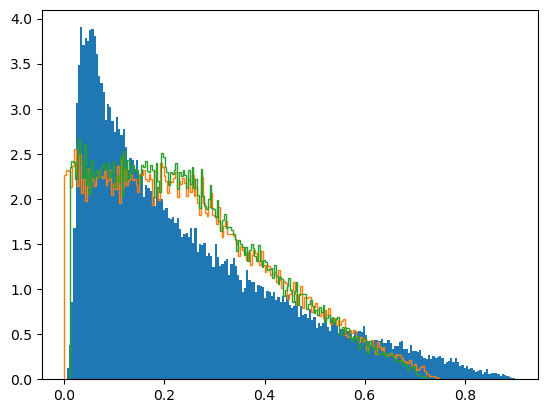

In [2]:

rand_state=density_matrix(rand_PSDM())
print(rand_state.matrix)
vis_optimizer_dm(rand_state, pio6,plot=True)


setting density_matrix data...
<class 'numpy.matrix'> <class 'numpy.matrix'>
Initial distance 0.3660254037844388
Initial classical fidelity: 0.9415201399619955
Initial quantum fidelity: 0.9659258262890684
Optimal visibility: 0.9220268532826605
setting density_matrix data...
Final classical fidelity: 0.9302821965289219
Final quantum fidelity: 0.9379531183794697
<class 'numpy.matrix'> <class 'numpy.matrix'>
Final distance: 0.35789388661333965
Theoretically predicted distance: 0.3449067640430059


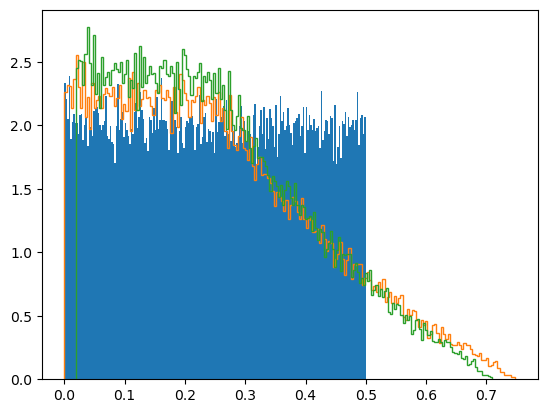

In [3]:
vis_optimizer_dm(pio4, pio6, plot=True)

Duża różnica między matrix_fidelity, a classical_fidelity. Przyczyna:

In [4]:
matrix_fidelity(pio1, pio2)

1.1248198369963933e-32

In [5]:
classical_fidelity(pio1, pio2)

setting density_matrix data...
setting density_matrix data...


0.9995383148575573

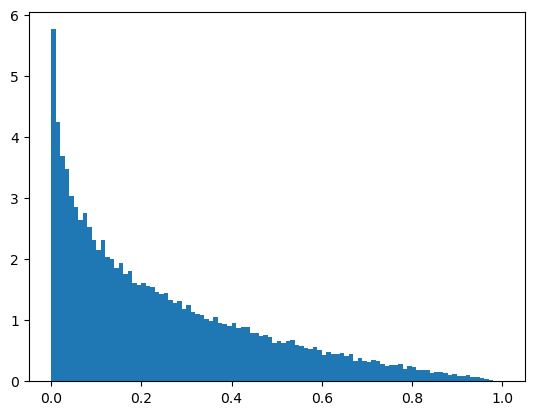

In [7]:
pio1.histogram()

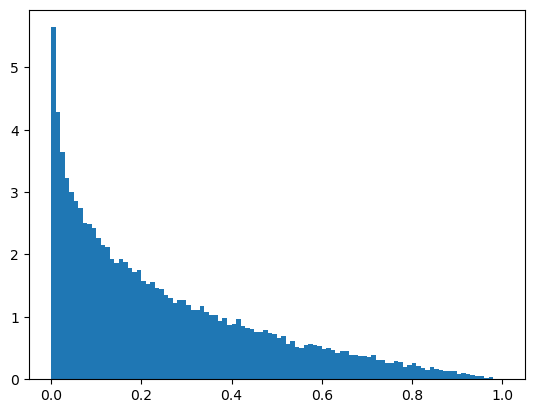

In [8]:
pio2.histogram()

Obrócenie macierzą unitarną nie zmienia histogramu

### Averaging over unitary matrices

Initial matrix:
[[0.27188 0.25746 0.16244 0.2267 ]
 [0.25746 0.31353 0.23129 0.2116 ]
 [0.16244 0.23129 0.18462 0.1261 ]
 [0.2267  0.2116  0.1261  0.22997]]
Final matrix:
[[ 0.25  0.    0.    0.  ]
 [ 0.    0.25  0.    0.  ]
 [ 0.    0.    0.25 -0.  ]
 [ 0.    0.   -0.    0.25]]


<Axes: >

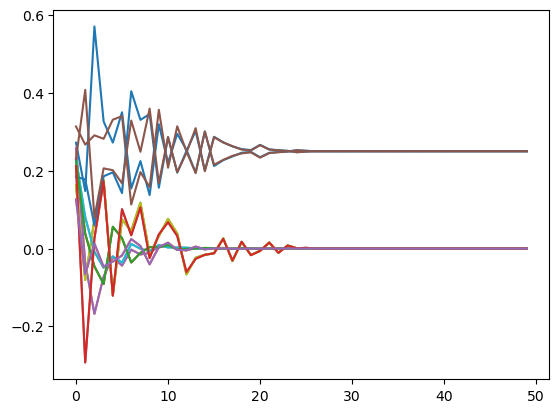

In [2]:
mat=rand_PSDM()
print('Initial matrix:')
print(mat)
mat, df = mean_over_unitars(mat,N=50, recording=True)
print('Final matrix:')
print(mat)
df.drop('Trace',axis=1).plot(legend=False)

Initial matrix:
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]
Final matrix:
[[ 0.25 -0.    0.    0.  ]
 [-0.    0.25 -0.   -0.  ]
 [ 0.   -0.    0.25  0.  ]
 [ 0.   -0.    0.    0.25]]


<Axes: >

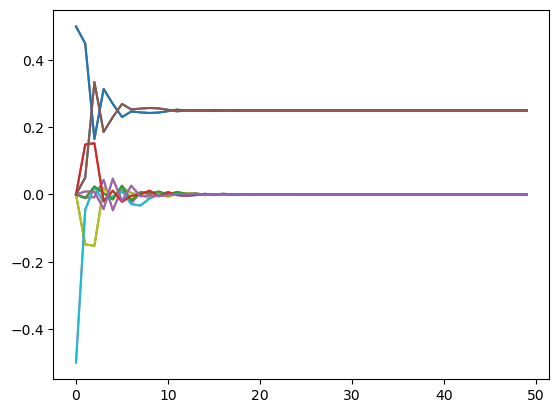

In [4]:
mat=np.matrix([[0,0,0,0],[0,0.5,-0.5,0],[0,-0.5,0.5,0],[0,0,0,0]])
print('Initial matrix:')
print(mat)
mat, df = mean_over_unitars(mat,N=50, recording=True)
print('Final matrix:')
print(mat)
df.drop('Trace',axis=1).plot(legend=False)

Initial matrix:
[[0.125   0.      0.      0.     ]
 [0.      0.5     0.21651 0.     ]
 [0.      0.21651 0.25    0.     ]
 [0.      0.      0.      0.125  ]]
Final matrix:
[[ 0.25 -0.    0.   -0.  ]
 [-0.    0.25  0.   -0.  ]
 [ 0.    0.    0.25 -0.  ]
 [-0.   -0.   -0.    0.25]]


<Axes: >

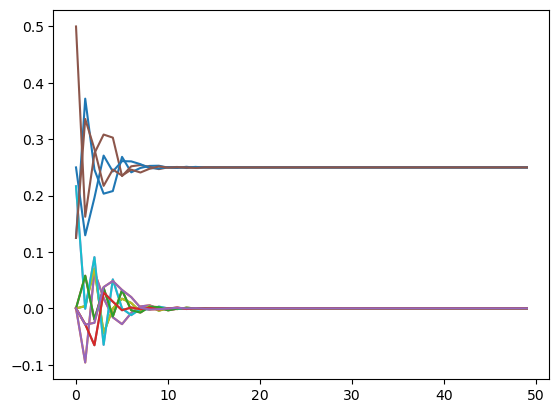

In [21]:
mat=pio6v05.matrix
print('Initial matrix:')
print(mat)
mat, df = mean_over_unitars(mat,N=50, recording=True)
print('Final matrix:')
print(mat)
df.drop('Trace',axis=1).plot(legend=False)

Initial matrix:
[[0.29629 0.1914  0.25994 0.24748]
 [0.1914  0.20671 0.19541 0.19245]
 [0.25994 0.19541 0.2699  0.24012]
 [0.24748 0.19245 0.24012 0.2271 ]]
Final matrix:
[[ 0.25319 -0.00165 -0.00309 -0.00047]
 [-0.00165  0.2467  -0.00196  0.00227]
 [-0.00309 -0.00196  0.24976 -0.00136]
 [-0.00047  0.00227 -0.00136  0.25036]]


<Axes: >

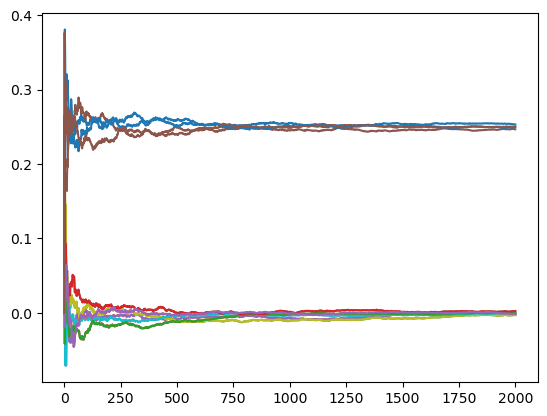

In [5]:
mat=rand_PSDM()
print('Initial matrix:')
print(mat)
mat, df= mean_over_unitars2(mat,N=2000, recording=True)
print('Final matrix:')
print(mat)
df.plot(legend=False)


### Optimizing for fidelity

Quantum fidelity 0.9330, 
 optimal quantum fidelity: 0.9329, 
 geometrical classical fidelity 0.8534, 
 statistical classical fidelity 0.8876, 
 another classical fidelity 0.9532


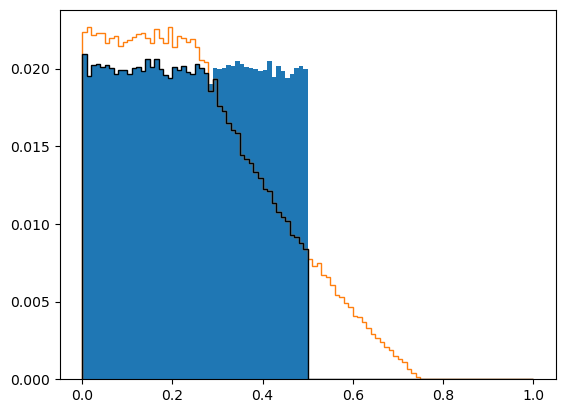

In [3]:
compare_fid(pio4, pio6, show_fidelity=True)

Quantum fidelity 0.4647, 
 optimal quantum fidelity: 0.4828, 
 geometrical classical fidelity 0.6537, 
 statistical classical fidelity 0.7559, 
 another classical fidelity 0.8310


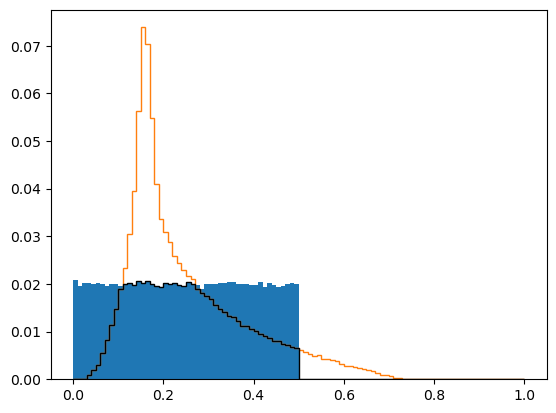

In [4]:

compare_fid(pio4, rand_state, show_fidelity=True)


Quantum fidelity 0.9891, 
 optimal quantum fidelity: 0.9891, 
 geometrical classical fidelity 0.9355, 
 statistical classical fidelity 0.9795, 
 another classical fidelity 0.9895


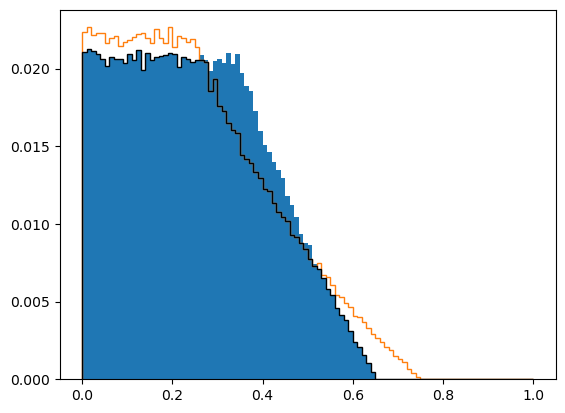

In [5]:
compare_fid(pio5, pio6, show_fidelity=True)

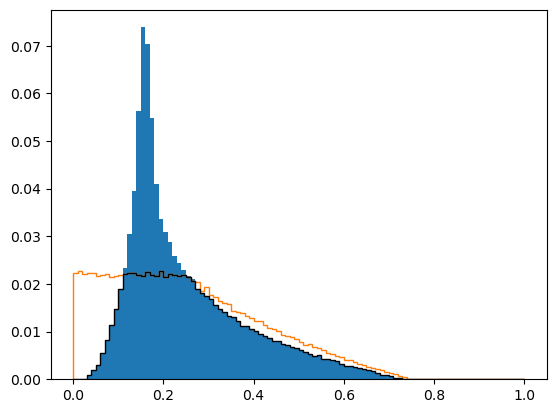

In [2]:
double_plot(rand_state, pio6, show_fidelity=True)

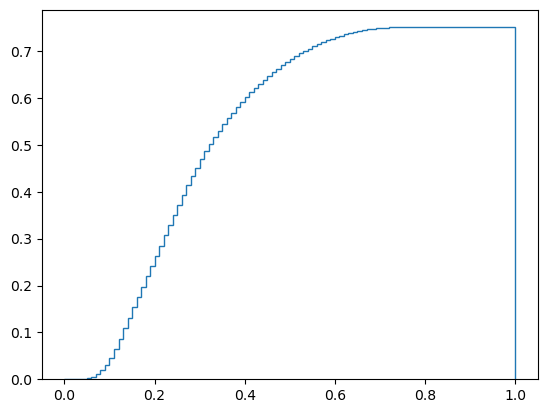

In [4]:
plt.stairs(classical_fidelity2(rand_state, pio6)[2], pio6.bins()['bins'])

Quantum fidelity 0.4174, 
 optimal quantum fidelity: 0.6167, 
 geometrical classical fidelity 0.7509, 
 statistical classical fidelity 0.8394, 
 another classical fidelity 0.8121


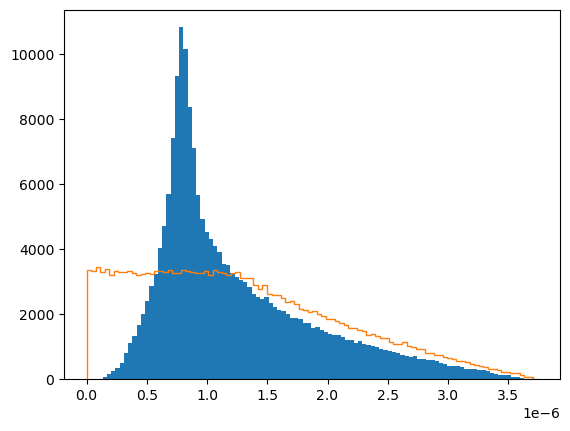

In [7]:
compare_fid(rand_state, pio6)

In [6]:
def expexted(dmA):
    probs = dmA.bins()['bins']
    probs = probs + probs[1]/2     #setting each value to be in the middle of intervals
    arrA = dmA.bins()['counts']/(len(probs)-1)
    A1 = (probs[:-1] * arrA).sum()
    return A1

### Averaging observations for different matrix distributions

In [32]:
mat = np.zeros((4,4), complex)
for par in parameters[:100000]:
    uA=unitary_mat2(par[0])
    uB=unitary_mat2(par[1])
    uAB = tens_prod2d(uA,uB)
    mat += uAB.getH()@np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]])@uAB

mat/100000
    

array([[ 0.24999+0.j     , -0.0013 +0.00089j, -0.00073-0.00087j,
         0.00044-0.00068j],
       [-0.0013 -0.00089j,  0.25004+0.j     ,  0.00004-0.00034j,
        -0.00076-0.00037j],
       [-0.00073+0.00087j,  0.00004+0.00034j,  0.25068+0.j     ,
        -0.00118+0.00055j],
       [ 0.00044+0.00068j, -0.00076+0.00037j, -0.00118-0.00055j,
         0.24929+0.j     ]])

In [9]:
def unitary_mat3(L=2):
    #mat=np.zeros((4,4))
    
    mat=np.random.normal(size=(L,L,2)).view(np.complex128).reshape(L,L,)
    mat2=mat.copy()
    for i in range(L):
            for j in range(i):
                mat2[i] -= mat2[j] * np.inner(np.conjugate(mat2[j]), mat[i]) / np.inner(np.conjugate(mat2[j]), mat2[j])
            #print(mat2[i], end=' ')
            mat2[i] /= np.sqrt(np.real(np.inner(np.conjugate(mat2[i]), mat2[i])))
            #print(mat2[i])
    return np.asmatrix(mat2)

In [12]:
matrices = []

for i in range(1000000):
    matrices.append([unitary_mat3(), unitary_mat3()])

np.save('matrices', matrices)

In [33]:
mat = np.matrix(np.zeros([4,4]), complex)
for mats in matrices[:100000]:
    uA = mats[0]
    uB = mats[1]
    uAB = tens_prod2d(uA, uB)
    mat+=uAB@np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]])@uAB.getH()/100000
    
mat

matrix([[ 0.25029+0.j     ,  0.00064+0.00053j, -0.00078-0.00047j,
          0.00001+0.00005j],
        [ 0.00064-0.00053j,  0.24957+0.j     , -0.0001 +0.00016j,
         -0.0001 -0.00057j],
        [-0.00078+0.00047j, -0.0001 -0.00016j,  0.24963-0.j     ,
          0.00019-0.00027j],
        [ 0.00001-0.00005j, -0.0001 +0.00057j,  0.00019+0.00027j,
          0.25052+0.j     ]])

Using Haar measure

In [11]:
import scipy as scp

def haar_measure(n=2):
    '''A Random matrix distributed with Haar measure'''
    z = (scp.randn(n,n) + 1j*scp.randn(n,n))/scp.sqrt(2.0)
    q,r = scp.linalg.qr(z)
    d = scp.diagonal(r)
    ph = d/scp.absolute(d)
    q = scp.multiply(q,ph,q)
    q = q / np.power(np.linalg.det(q), 1/n)
    return q


In [20]:
mat = np.zeros((2,2), dtype = complex)
for i in range(10000):
    m = haar_measure()
    mat+=m@np.array([[0,0],[0,1]])@np.transpose(np.conjugate(m))
mat/=10000
mat

C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:5: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  z = (scp.randn(n,n) + 1j*scp.randn(n,n))/scp.sqrt(2.0)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  z = (scp.randn(n,n) + 1j*scp.randn(n,n))/scp.sqrt(2.0)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:7: DeprecationWarning: scipy.diagonal is deprecated and will be removed in SciPy 2.0.0, use numpy.diagonal instead
  d = scp.diagonal(r)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:8: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
  ph = d/scp.absolute(d)
C:\Users\Jan\AppData\Local\Temp\ipykernel_21276\2436201075.py:9: DeprecationWarning: scipy.multiply is deprecated and will be 

array([[ 0.50074+0.j     , -0.0069 +0.00287j],
       [-0.0069 -0.00287j,  0.49926+0.j     ]])

### Optimizing for all parameters

Initial distance 0.3347016587147192
Initial matrix fidelity: 0.7343266019465731
Optimal visibility: 0.6457688025954307
Final matrix fidelity: 0.92938008276571
Final distance: 0.13385494489096011


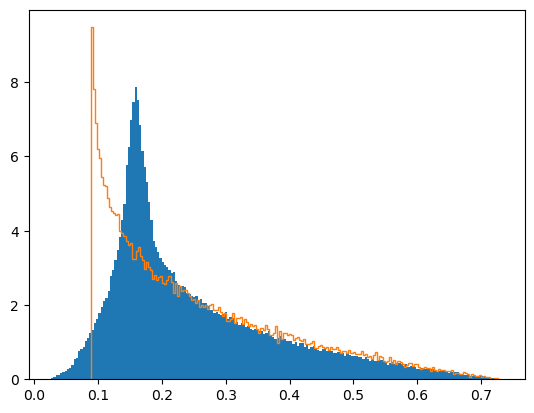

0.6457688025954307

In [3]:
ans = optimal_matrix_fidelity(rand_state)
angle = ans['angle']
opt_matrix = density_matrix(rho2(angle, 1))
opt_matrix2=density_matrix(rotate_matrix(opt_matrix, ans['parameters'][0],ans['parameters'][1]))
vis_optimizer_dm(rand_state, opt_matrix2, plot=True)

In [4]:
print(f'Classical fidelity 1: {classical_fidelity(opt_matrix2, rand_state)} \n classical fidelity 2: {classical_fidelity2(opt_matrix2, rand_state)[0]} \n classical fidelity 3: {classical_fidelity3(opt_matrix2, rand_state)}')

setting density_matrix data...
Classical fidelity 1: 0.6923559243752593 
 classical fidelity 2: 0.62490499999999 
 classical fidelity 3: 0.18542126515021948


setting density_matrix data...


{'distance': 0.1296789486999658,
 'angle': 1.5292786732238057,
 'visibility': 0.6469069776183887,
 'parameters': [array([3.9331 , 3.69967, 0.55808]),
  array([5.68686, 0.55808, 3.69967])]}

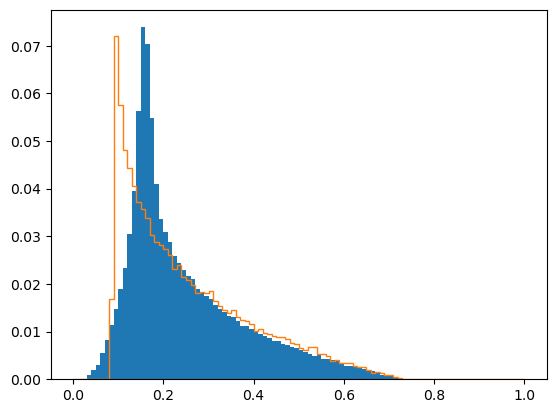

In [29]:
ansB = optimal_matrix_fidelity_vis(rand_state)
angleB = ansB['angle']
visB = ansB['visibility']
opt_matrixB = density_matrix(rho2(angleB, visB))
opt_matrix2B = density_matrix(rotate_matrix(opt_matrixB, ansB['parameters'][0], ansB['parameters'][1]))
double_plot(rand_state, opt_matrixB)
ansB

## Generating Data for ML

## Measures

In [2]:
data_save_iterator(2,2,'test')

Successfuly simulated 1 of 2 samples


c:\Users\Jan\Desktop\Uni_Wrrr\Kwantowa_informacja\Magisterka\WernerTomography2\myPackage\my_module.py:632: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.reset_index().drop('index', axis=1)


Successfuly simulated 1 of 2 samples


c:\Users\Jan\Desktop\Uni_Wrrr\Kwantowa_informacja\Magisterka\WernerTomography2\myPackage\my_module.py:632: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.reset_index().drop('index', axis=1)


In [5]:
df = pd.read_csv('dataJK/testdata1.csv')
df.loc[df.Category=='Measures']

,Category,Index,0,1
124,Measures,Distance,(0.06855854064609511+0j),(0.059691675767920616+0j)
125,Measures,MatrixFidelity,(0.9578760260205241+0j),(0.9856927732105027+0j)
126,Measures,HistogramFidelity,(0.9779271413762205+0j),(0.9832229574648416+0j)
127,Measures,Covering,(0.9533399999999822+0j),(0.9408599999999826+0j)
128,Measures,ConcurrenceOriginal,(0.46486853086663116+0j),(0.06592972170020572+0j)
129,Measures,ConcurrenceOpt,(0.4656307497604407+0j),(0.010438661970332386+0j)
130,Measures,CHSHViolationMOriginal,(0.12645098690852705+0j),0j
131,Measures,CHSHViolationMOpt,(0.26765860271226505+0j),0j


In [39]:
angle = np.linspace(0, pi/2, 100)
vis = np.linspace(0,1,100)
conc = []
for an in angle:
    c=[]
    for v in vis:
        c.append(concurrence(density_matrix(rho2(an, v))))  
    conc.append(c)
    


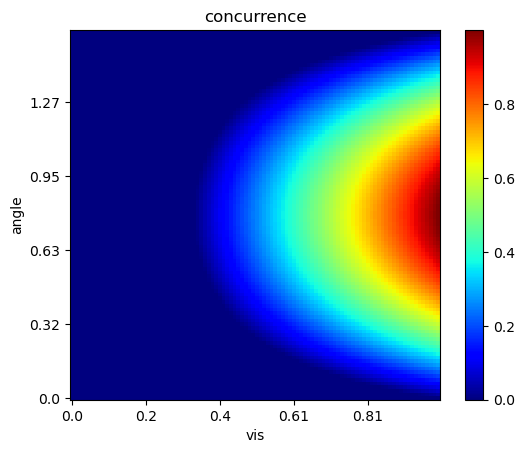

In [15]:
plt.imshow(conc, interpolation='none', cmap=plt.cm.jet, origin='lower')  
plt.colorbar()
plt.ylabel('angle')
plt.xlabel('vis')
plt.title('concurrence')
plt.yticks(range(0,len(angle),20), np.round(angle[::20], 2))
plt.xticks(range(0,len(vis),20), np.round(vis[::20], 2))
plt.show()

In [4]:
angle = np.linspace(0, pi/2, 100)
vis = np.linspace(0,1,100)
chshviol = []
for an in angle:
    c=[]
    for v in vis:
        c.append(CHSHviolation_measure(density_matrix(rho2(an, v))))  
    chshviol.append(c)


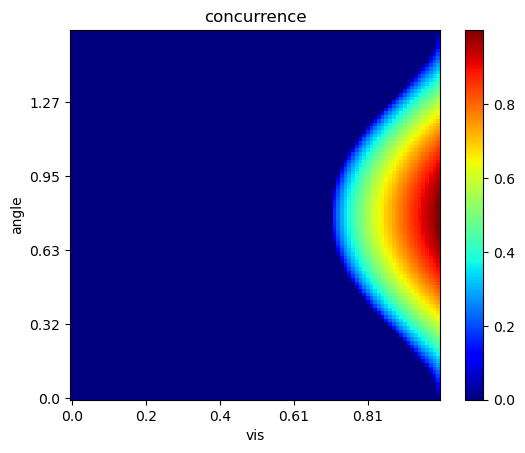

In [5]:
plt.imshow(chshviol, interpolation='none', cmap=plt.cm.jet, origin='lower')  
plt.colorbar()
plt.ylabel('angle')
plt.xlabel('vis')
plt.title('chsh')
plt.yticks(range(0,len(angle),20), np.round(angle[::20], 2))
plt.xticks(range(0,len(vis),20), np.round(vis[::20], 2))
plt.show()

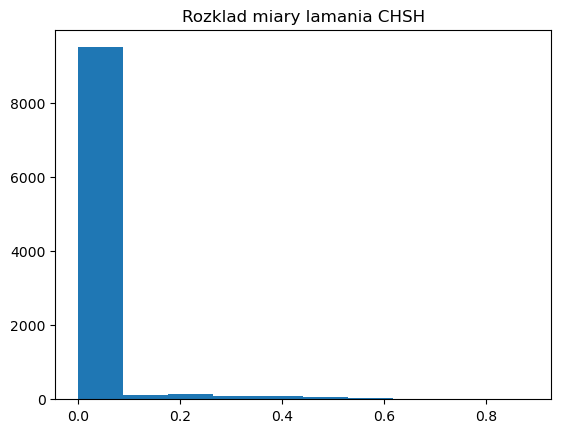

In [21]:
chsh=[]
for i in range(10000):
    chsh.append(CHSHviolation_measure(density_matrix(rand_PSDM())))

plt.hist(chsh)
plt.title('Rozklad miary lamania CHSH')
plt.show()

(array([ 57., 101., 133.,  94.,  81.,  48.,  22.,   7.,   3.,   1.]),
 array([0.01151, 0.09867, 0.18584, 0.273  , 0.36016, 0.44733, 0.53449,
        0.62165, 0.70881, 0.79598, 0.88314]),
 <BarContainer object of 10 artists>)

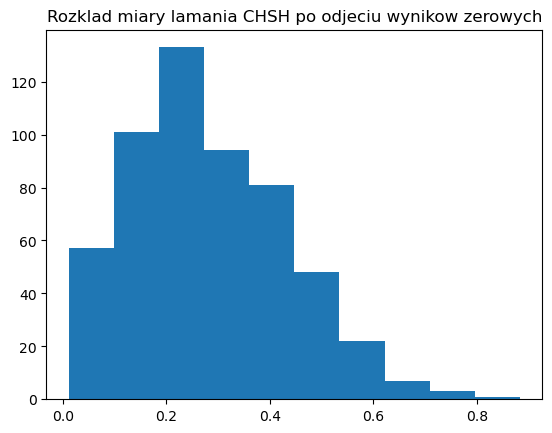

In [22]:
chsh2=[]
for c in chsh:
    if c>0:
        chsh2.append(c)

plt.title('Rozklad miary lamania CHSH po odjeciu wynikow zerowych')
plt.hist(chsh2)        


In [19]:
chsh.count(0)

9455

In [20]:
np.sum(np.array(chsh)>0.1)

494

(array([395., 191., 155.,  94.,  67.,  46.,  25.,  16.,   7.,   4.]),
 array([0.     , 0.06625, 0.13251, 0.19876, 0.26501, 0.33126, 0.39752,
        0.46377, 0.53002, 0.59628, 0.66253]),
 <BarContainer object of 10 artists>)

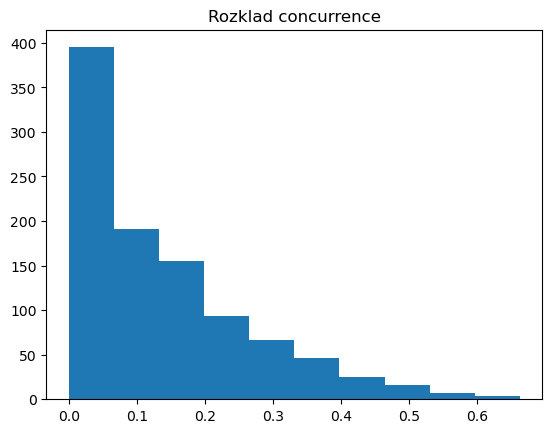

In [23]:
conc=[]
for i in range(1000):
    conc.append(concurrence(density_matrix(rand_PSDM())))

plt.title('Rozklad concurrence')
plt.hist(conc)

In [5]:
np.sum(np.array(conc)>0.01)

779

In [2]:
def optimal_matrix_fidelity_discrete(dmA, angle):
    from scipy.optimize import differential_evolution
    def f(params, matrixA, angle):
        matrixA = matrixA.matrix if type(matrixA) == density_matrix else matrixA
        matrixB = rho2(angle, 1)
        paramsA = params[:3]
        paramsB = params[3:]
        return -1*matrix_fidelity(rotate_matrix(matrixB, paramsA, paramsB), matrixA)
    bounds = [(0,2*pi), (0,2*pi), (0,2*pi), (0,2*pi), (0,2*pi), (0,2*pi)]
    res = differential_evolution(f, args=(dmA,angle,), bounds=bounds)
    return {'value': -res['fun'], 'parameters': [res['x'][:3].tolist(), res['x'][3:6].tolist()], 'angle': angle}


## Simulating and data analysis

In [2]:
from myPackage.my_module import *

In [4]:
alldata = load_samples('alldata')

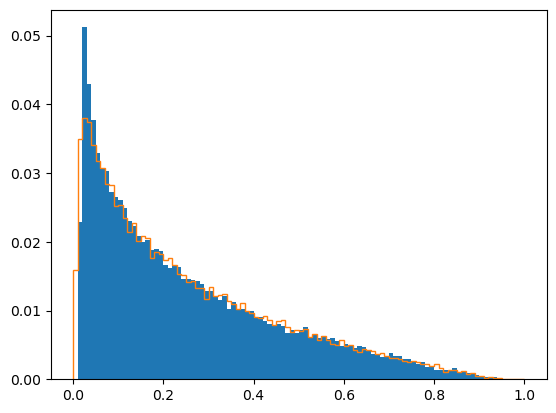

In [15]:
alldata.double_plot(123)

### Concurrence

In [5]:
conc_diff=[]
for i in range(alldata.Measures.shape[0]):
    C1 = alldata.Measures['ConcurrenceOriginal'][i]
    C2 = alldata.Measures['ConcurrenceOpt'][i]
    #D = df[['Measures', 'Distance']] 
    if (C1==0 and C2==0):
        conc_diff.append(np.nan)
    else:
        conc_diff.append(C1 - C2)
alldata.Measures['ConcDifference'] = conc_diff


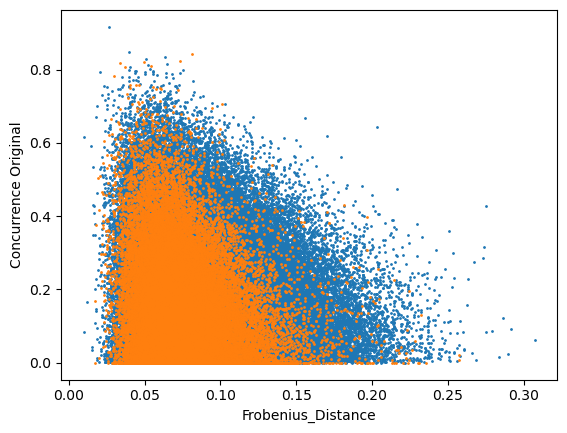

In [18]:
plt.xlabel('Frobenius_Distance')
plt.ylabel('Concurrence Original')
positive_delta_c = alldata.Measures['ConcDifference']>=0
negative_delta_c = alldata.Measures['ConcDifference']<0
plt.scatter(alldata.Measures['Distance'].loc[positive_delta_c][::5], alldata.Measures['ConcurrenceOriginal'].loc[positive_delta_c][::5], s=1)
plt.scatter(alldata.Measures['Distance'].loc[negative_delta_c][::5], alldata.Measures['ConcurrenceOriginal'].loc[negative_delta_c][::5], s=1)

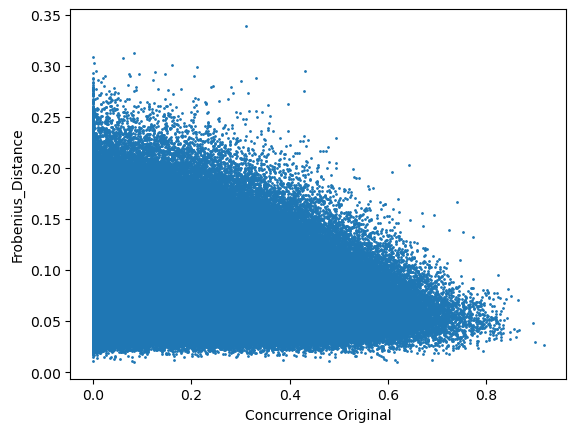

In [7]:
plt.ylabel('Frobenius_Distance')
plt.xlabel('Concurrence Original')
plt.scatter(alldata.Measures.ConcurrenceOriginal, alldata.Measures.Distance, s=1)

### Non-locality

In [12]:
chsh_diff=[]
for i in range(alldata.Measures.shape[0]):
    C1 = alldata.Measures['CHSHViolationMOriginal'][i]
    C2 = alldata.Measures['CHSHViolationMOpt'][i]
    #D = df[['Measures', 'Distance']] 
    if (C1==0 and C2==0):
        chsh_diff.append(np.nan)
    else:
        chsh_diff.append(C1 - C2)
alldata.Measures['CHSHDifference'] = chsh_diff

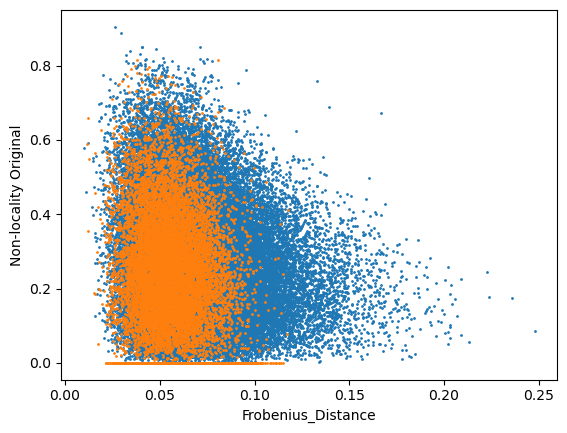

In [13]:
plt.xlabel('Frobenius_Distance')
plt.ylabel('Non-locality Original')
positive_delta_b = alldata.Measures['CHSHDifference']>=0
negative_delta_b = alldata.Measures['CHSHDifference']<0
plt.scatter(alldata.Measures['Distance'].loc[positive_delta_b], alldata.Measures['CHSHViolationMOriginal'].loc[positive_delta_b], s=1)
plt.scatter(alldata.Measures['Distance'].loc[negative_delta_b], alldata.Measures['CHSHViolationMOriginal'].loc[negative_delta_b], s=1)

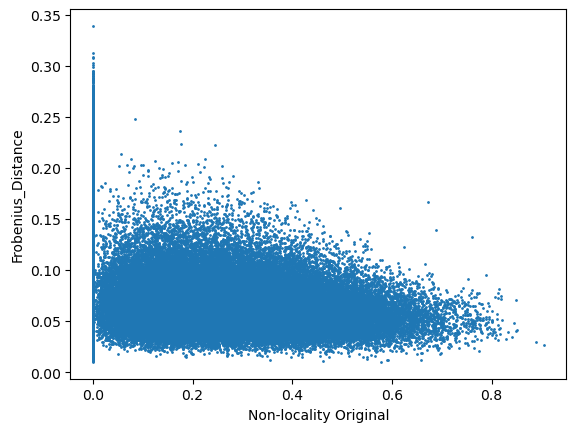

In [19]:
plt.ylabel('Frobenius_Distance')
plt.xlabel('Non-locality Original')
plt.scatter(alldata.Measures.CHSHViolationMOriginal, alldata.Measures.Distance, s=1)

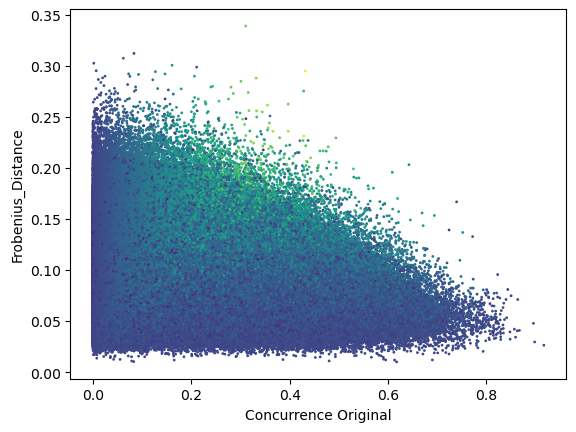

In [21]:
plt.ylabel('Frobenius_Distance')
plt.xlabel('Concurrence Original')
plt.scatter(alldata.Measures.ConcurrenceOriginal[::], alldata.Measures.Distance[::], c=alldata.Measures.ConcDifference[::], s=1)

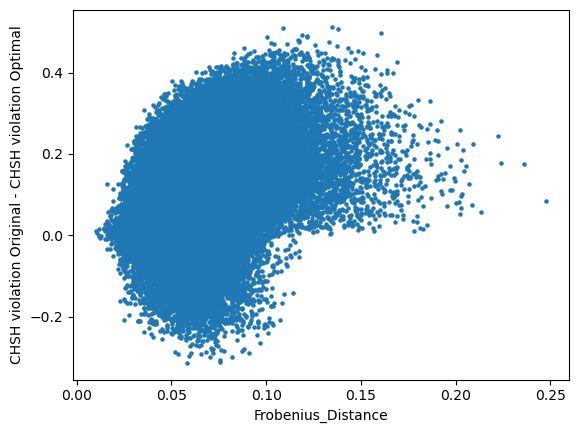

In [52]:
chsh_diff=[]
for i in range(df.shape[0]):
    c1 = df['Measures', 'CHSHViolationMOriginal'][i]
    c2 = df['Measures', 'CHSHViolationMOpt'][i]
    #D = df[['Measures', 'Distance']]
    if (c1==0 and c2==0):
        chsh_diff.append(np.nan)
    else:
        chsh_diff.append(c1 - c2)
plt.xlabel('Frobenius_Distance')
plt.ylabel('CHSH violation Original - CHSH violation Optimal')
plt.scatter(df['Measures', 'Distance'], chsh_diff, s=5)

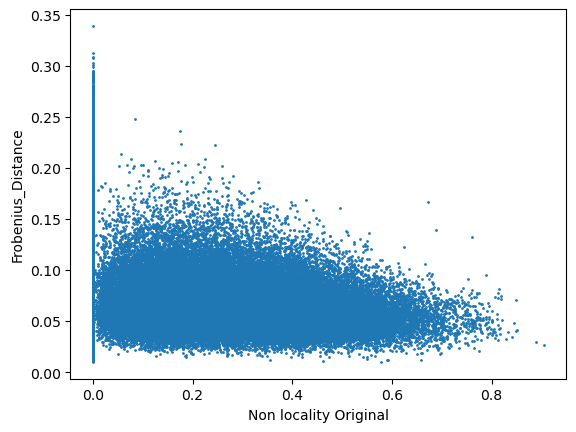

In [13]:
plt.ylabel('Frobenius_Distance')
plt.xlabel('Non locality Original')
plt.scatter(alldata.Measures.CHSHViolationMOriginal, alldata.Measures.Distance, s=1)

In [ ]:
alldata.Measures['SqrtDist'] = alldata.Measures['Distance']**(1/2)
alldata.Measures['CHSHdiff'] = alldata.Measures['CHSHViolationMOriginal'] - alldata.Measures['CHSHViolationMOpt']
alldata.Measures['CHSHdiff'].loc[alldata.Measures['CHSHdiff']==0] = np.nan
plt.scatter(alldata.Measures['SqrtDist'], alldata.Measures['CHSHdiff'])

(array([ 41756., 544239., 555899., 206749.,  56591.,  13283.,   2619.,
           408.,     52.,      4.]),
 array([0.01   , 0.0429 , 0.0758 , 0.10871, 0.14161, 0.17451, 0.20741,
        0.24031, 0.27321, 0.30611, 0.33901]),
 <BarContainer object of 10 artists>)

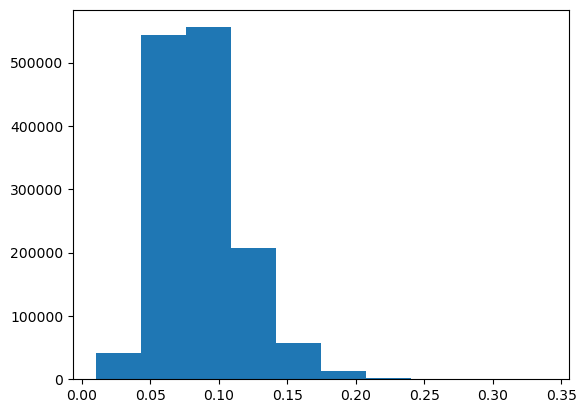

In [4]:
plt.hist(alldata.Measures.Distance)

In [22]:
alldata.OptimalState.loc[alldata.Measures.Distance>=3.39e-01].Visibility.values

array([0.42888])

In [20]:
alldata.Measures

,Distance,MatrixFidelity,HistogramFidelity,Covering,ConcurrenceOriginal,ConcurrenceOpt,CHSHViolationMOriginal,CHSHViolationMOpt,ConcDifference
Index,,,,,,,,,
0,0.115217,0.955955,0.926760,0.91418,0.146781,0.067205,0.0,0.0,0.079576
1,0.096771,0.955965,0.961050,0.94398,0.157117,0.103378,0.0,0.0,0.053738
2,0.078480,0.975497,0.951201,0.93788,0.052681,0.003809,0.0,0.0,0.048872
3,0.052174,0.982082,0.975008,0.95980,0.168534,0.186200,0.0,0.0,-0.017667
4,0.118473,0.943495,0.910021,0.89618,0.139199,0.106099,0.0,0.0,0.033100
...,...,...,...,...,...,...,...,...,...
1421595,0.038934,0.990254,0.995673,0.97322,0.106029,0.100389,0.0,0.0,0.005640
1421596,0.077414,0.946649,0.960665,0.89884,0.091198,0.052040,0.0,0.0,0.039158
1421597,0.102449,0.951012,0.964801,0.94092,0.319623,0.294844,0.0,0.0,0.024779


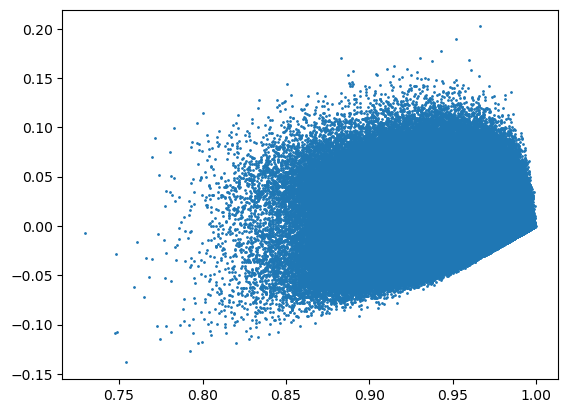

In [23]:
plt.scatter(alldata.Measures.MatrixFidelity, alldata.Measures.MatrixFidelity - alldata.Measures.HistogramFidelity, s=1)

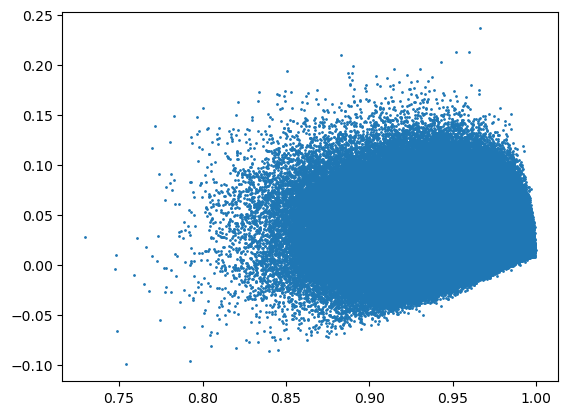

In [24]:
plt.scatter(alldata.Measures.MatrixFidelity, alldata.Measures.MatrixFidelity - alldata.Measures.Covering, s=1)

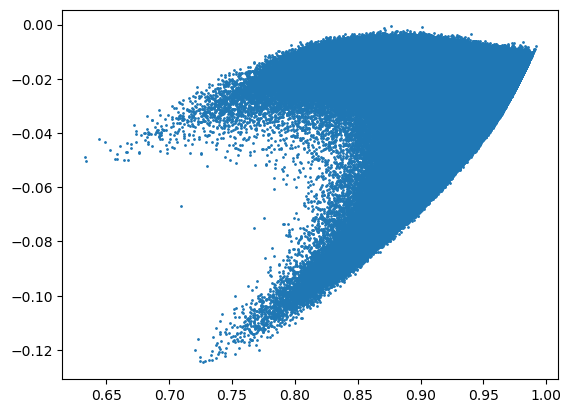

In [25]:
plt.scatter(alldata.Measures.Covering, alldata.Measures.Covering - alldata.Measures.HistogramFidelity, s=1)

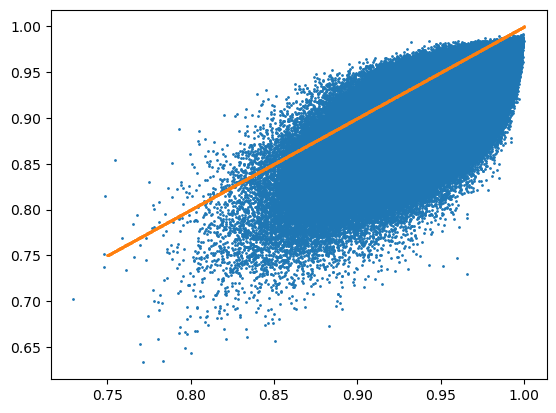

In [30]:
plt.scatter(alldata.Measures.MatrixFidelity,  alldata.Measures.Covering, s=1)
plt.scatter(np.linspace(0.75,1,1000),np.linspace(0.75,1,1000), s=1)


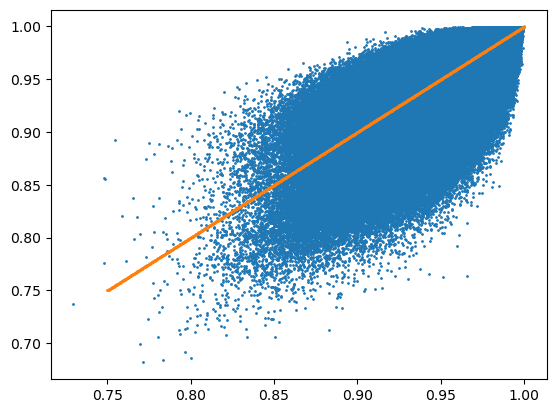

In [31]:
plt.scatter(alldata.Measures.MatrixFidelity,  alldata.Measures.HistogramFidelity, s=1)
plt.scatter(np.linspace(0.75,1,1000),np.linspace(0.75,1,1000), s=1)

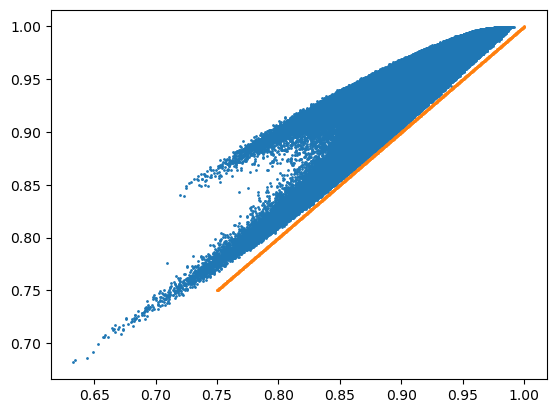

In [32]:
plt.scatter(alldata.Measures.Covering,  alldata.Measures.HistogramFidelity, s=1)
plt.scatter(np.linspace(0.75,1,1000),np.linspace(0.75,1,1000), s=1)

In [33]:
(alldata.Measures.MatrixFidelity - alldata.Measures.HistogramFidelity).describe()

count    1.421600e+06
mean     3.527849e-03
std      2.401569e-02
min     -1.384733e-01
25%     -1.238452e-02
50%     -5.954422e-04
75%      1.661334e-02
max      2.022566e-01
dtype: float64

(array([    1.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     1.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     2.,     1.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     1.,     0.,     1.,     0.,
            0.,     0.,     0.,     1.,     0.,     0.,     0.,     1.,
            0.,     0.,     1.,     0.,     0.,     0.,     3.,     1.,
            0.,     0.,     0.,     3.,     1.,     1.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     1.,     0.,
            0.,     1.,     1.,     1.,     0.,     2.,     1., 

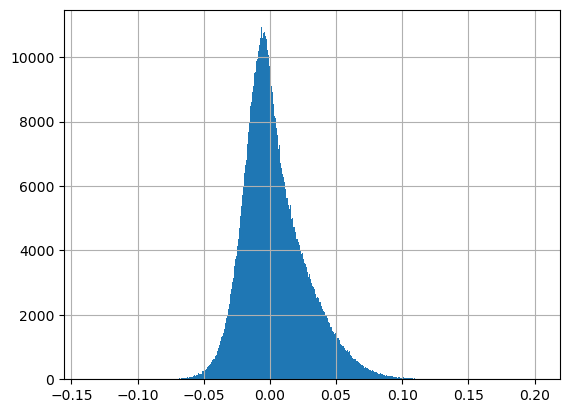

In [36]:
plt.grid(True)
plt.hist(alldata.Measures.MatrixFidelity - alldata.Measures.HistogramFidelity, bins=1000)

In [37]:
from scipy.stats import normaltest
normaltest(alldata.Measures.MatrixFidelity - alldata.Measures.HistogramFidelity)

NormaltestResult(statistic=144834.14042471987, pvalue=0.0)

In [86]:
test=pd.read_csv('dataJK/test0Matrix.csv', index_col='Unnamed: 0')

In [87]:
test

,"0,0","0,1","0,2","0,3","1,0","1,1","1,2","1,3","2,0","2,1","2,2","2,3","3,0","3,1","3,2","3,3"
0,(0.22246407756174819+0j),(0.06382169960596501-0.11958768836846032j),(0.07725612330262957+0.07556334325505569j),(0.028383188663731428-0.0195243023400343j),(0.06382169960596501+0.11958768836846032j),(0.36774266505689446+0j),(0.042625322953690085+0.05567014727549628j),(0.013972588958607023+0.28247874087923j),(0.07725612330262957-0.07556334325505569j),(0.042625322953690085-0.05567014727549628j),(0.09773044941411699+0j),(0.02920117681274136+0.034794767222766226j),(0.028383188663731428+0.0195243023400343j),(0.013972588958607023-0.28247874087923j),(0.02920117681274136-0.034794767222766226j),(0.3120628079672404+0j)
1,(0.3421934433554022+0j),(0.006476721369886518+0.09052571893141101j),(0.08091651708704806+0.159567290968408j),(-0.07168845868146226+0.06113446958262842j),(0.006476721369886518-0.09052571893141101j),(0.1901692731157212+0j),(0.18292932313362573-0.09037521217885447j),(0.010860418964442894+0.025055191247850522j),(0.08091651708704806-0.159567290968408j),(0.18292932313362573+0.09037521217885447j),(0.33737152196067577+0j),(0.09806481024400704+0.06522280925698827j),(-0.07168845868146226-0.06113446958262842j),(0.010860418964442894-0.025055191247850522j),(0.09806481024400704-0.06522280925698827j),(0.13026576156820094+0j)


## Reading data from second computations

In [95]:
def complexify(x):
    return complex(x)

In [2]:
from myPackage.my_module import *

In [2]:
allcomplex = load_samples('all_complex')

In [8]:
alldata = load_samples('alldata')

In [5]:
def analyze_samples(samp):
    chsh_diff=[]
    for i in range(samp.Measures.shape[0]):
        C1 = samp.Measures['CHSHViolationMOriginal'][i]
        C2 = samp.Measures['CHSHViolationMOpt'][i]
        #D = df[['Measures', 'Distance']] 
        if (C1==0 and C2==0):
            chsh_diff.append(np.nan)
        else:
            chsh_diff.append(C1 - C2)
    samp.Measures['CHSHDifference'] = chsh_diff
    
    conc_diff=[]
    for i in range(samp.Measures.shape[0]):
        C1 = samp.Measures['ConcurrenceOriginal'][i]
        C2 = samp.Measures['ConcurrenceOpt'][i]
        #D = df[['Measures', 'Distance']] 
        if (C1==0 and C2==0):
            conc_diff.append(np.nan)
        else:
            conc_diff.append(C1 - C2)
    samp.Measures['ConcDifference'] = conc_diff
    
    plt.xlabel('Frobenius_Distance')
    plt.ylabel('Concurrence Original')
    positive_delta_c = samp.Measures['ConcDifference']>=0
    negative_delta_c = samp.Measures['ConcDifference']<0
    plt.scatter(samp.Measures['Distance'].loc[positive_delta_c][::5], samp.Measures['ConcurrenceOriginal'].loc[positive_delta_c][::5], s=1)
    plt.scatter(samp.Measures['Distance'].loc[negative_delta_c][::5], samp.Measures['ConcurrenceOriginal'].loc[negative_delta_c][::5], s=1)
    plt.show()
    print(f'Ratio of negative concurrence delta to positives: {negative_delta_c.mean()}')
    
    plt.xlabel('Frobenius_Distance')
    plt.ylabel('Non-locality Original')
    positive_delta_b = samp.Measures['CHSHDifference']>=0
    negative_delta_b = samp.Measures['CHSHDifference']<0
    plt.scatter(samp.Measures['Distance'].loc[positive_delta_b], samp.Measures['CHSHViolationMOriginal'].loc[positive_delta_b], s=1)
    plt.scatter(samp.Measures['Distance'].loc[negative_delta_b], samp.Measures['CHSHViolationMOriginal'].loc[negative_delta_b], s=1)
    plt.show()
    print(f'Ratio of negative nonlocality delta to positives: {negative_delta_b.mean()}')
    
    plt.xlabel('Matrix Fidelity')
    plt.ylabel('Covering')
    plt.scatter(samp.Measures.MatrixFidelity,  samp.Measures.Covering, s=1)
    plt.scatter(np.linspace(0.75,1,1000),np.linspace(0.75,1,1000), s=1)
    plt.show()
        
    plt.xlabel('Matrix Fidelity')
    plt.ylabel('Histogram Fidelity')
    plt.scatter(samp.Measures.MatrixFidelity,  samp.Measures.HistogramFidelity, s=1)
    plt.scatter(np.linspace(0.75,1,1000),np.linspace(0.75,1,1000), s=1)
    plt.show()
    
    plt.xlabel('Histogram Fidelity')
    plt.ylabel('Covering')
    plt.scatter(samp.Measures.HistogramFidelity,  samp.Measures.Covering, s=1)
    plt.scatter(np.linspace(0.75,1,1000),np.linspace(0.75,1,1000), s=1)
    plt.show()
    
    plt.xlabel('Distance')
    plt.hist(samp.Measures.Distance)
    plt.show()
    
    plt.title('Errors of Histogram Fidelity')    
    plt.grid(True)
    plt.hist(samp.Measures.MatrixFidelity - samp.Measures.HistogramFidelity, bins=1000)    
    plt.show()    
    

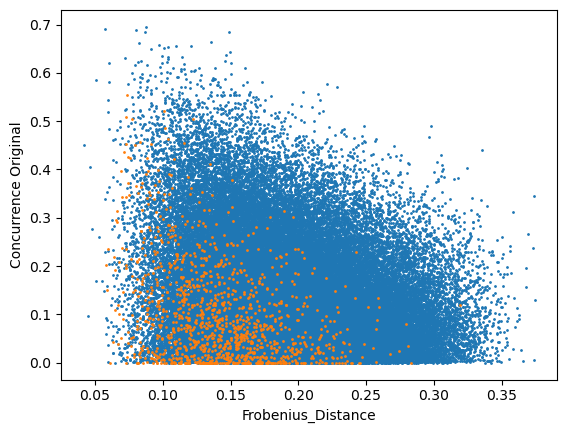

Ratio of negative concurrence delta to positives: 0.008514150943396226


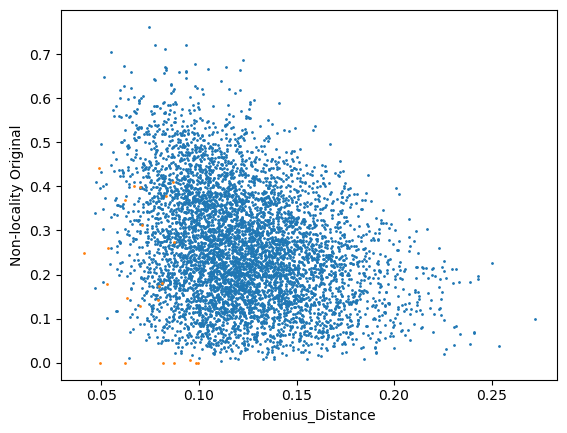

Ratio of negative nonlocality delta to positives: 3.1908990011098776e-05


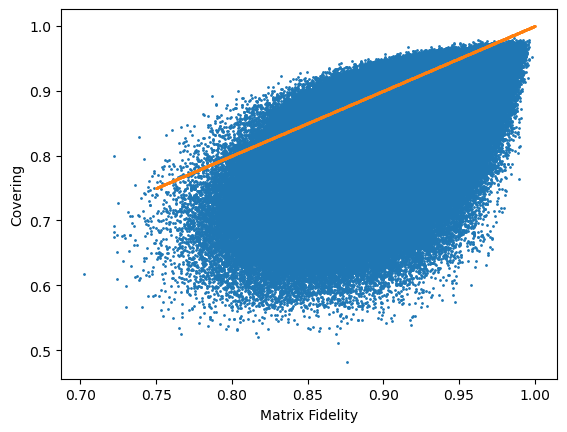

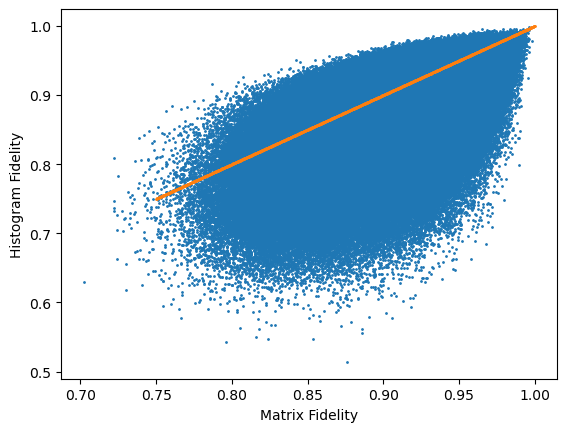

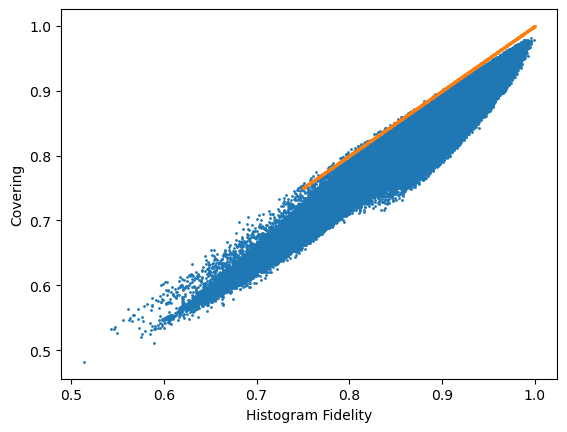

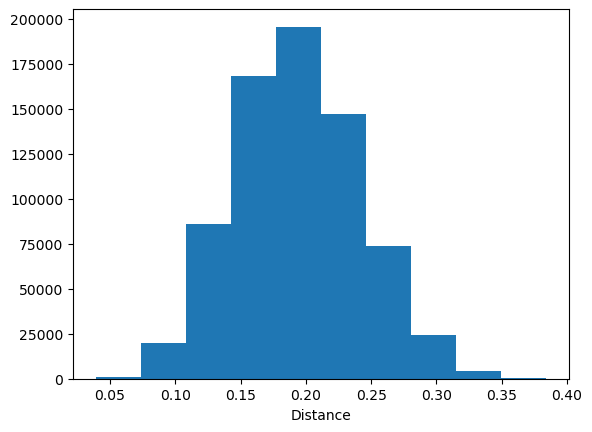

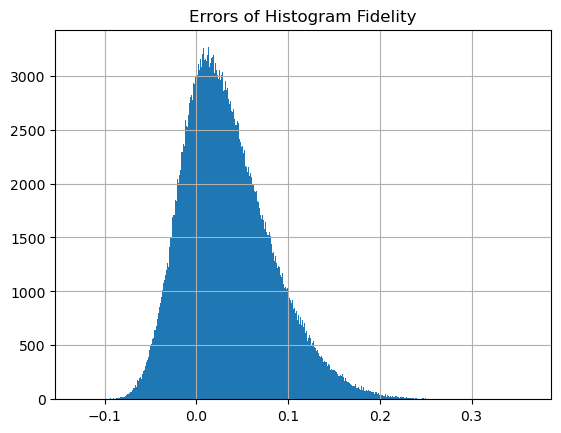

In [6]:
analyze_samples(allcomplex)

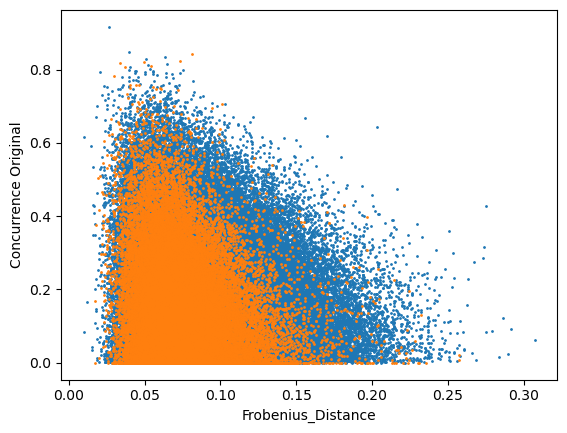

Ratio of negative concurrence delta to positives: 0.11294667979741137


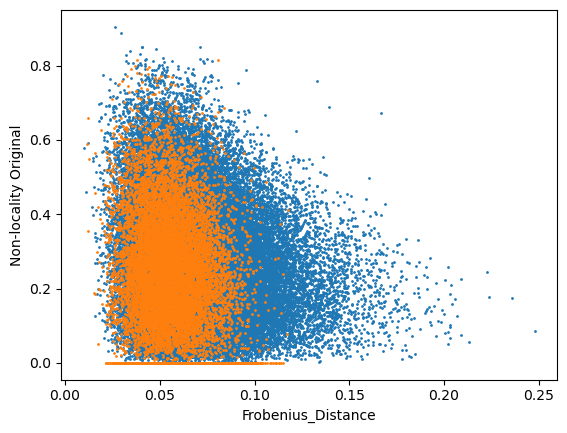

Ratio of negative nonlocality delta to positives: 0.009736916150815981


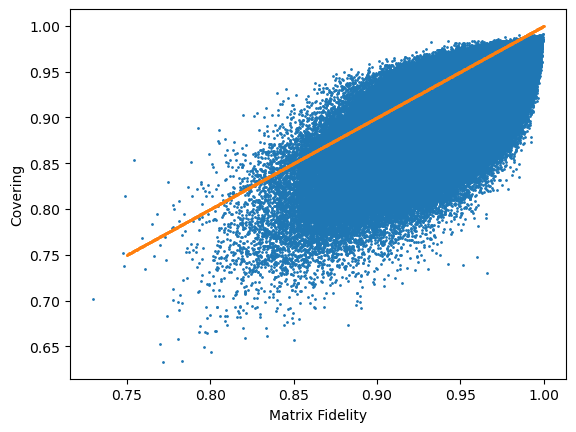

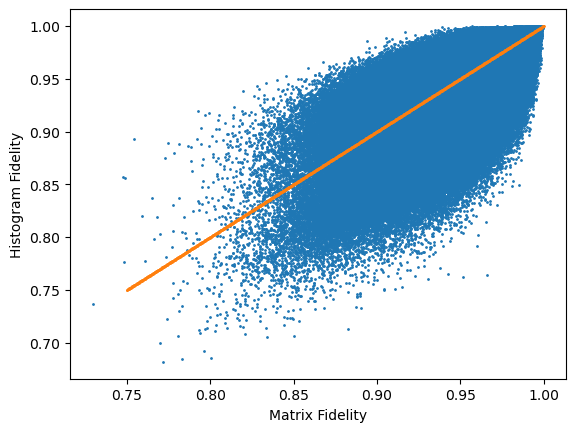

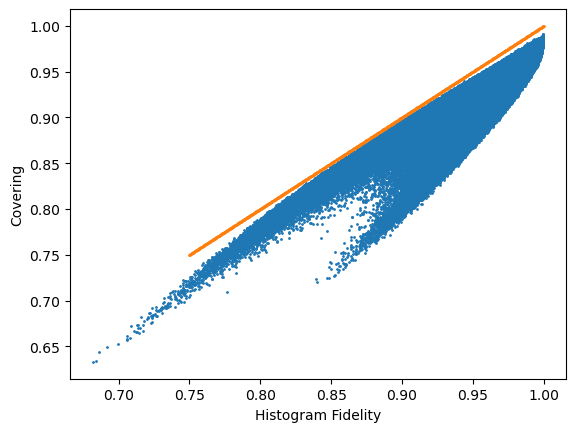

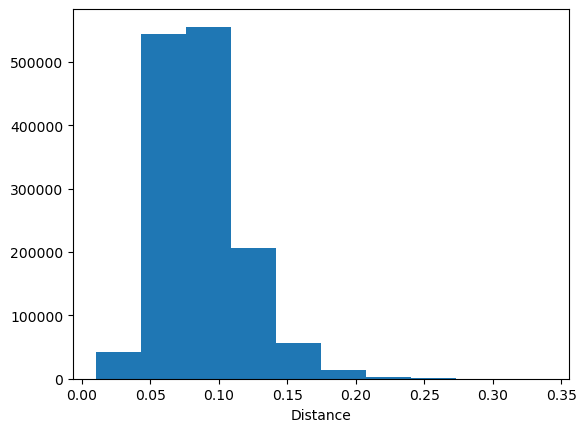

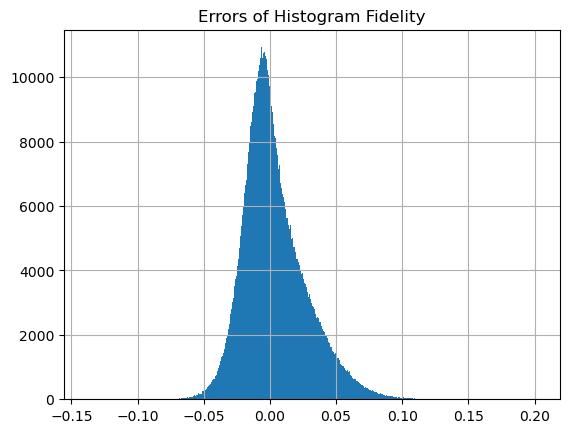

In [9]:
analyze_samples(alldata)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    2.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,    1.,
           0.,    2.,    0.,    1.,    0.,    0.,    1.,    0.,    1.,
           0.,    0.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    2.,    0.,    0.,    1.,
      

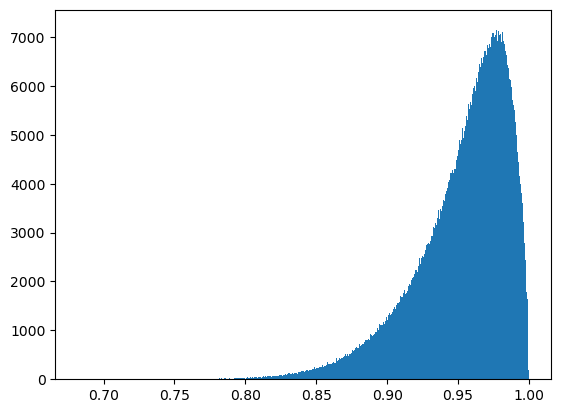

In [13]:
plt.hist(alldata.Measures.HistogramFidelity, bins=1000)

In [6]:
state=rand_PSDM(4)

In [7]:
matrix_fidelity(state, pio4)

0.4195350775948266

In [13]:
dist_from_samps(allcomplex.Matrix.iloc[0], pio4)

0.9883487115254447

In [12]:
def dist_from_samps(seq, mat):
    seq = np.reshape(seq.values, (4,4))
    return Frobenius_dist(seq, mat)

In [18]:
def fid_from_samps(seq, mat):
    seq = np.reshape(seq.values, (4,4))
    return matrix_fidelity(seq, mat)

In [16]:
dens = density_matrix(np.reshape(allcomplex.Matrix.iloc[0],(4,4)))

In [17]:
matrix_fidelity(dens, pio4)

0.2737620452636549

In [20]:
allcomplex.Measures['FidelityWerner'] = pd.Series([fid_from_samps(allcomplex.Matrix.iloc[i], pio4) for i in range(len(allcomplex.Matrix))])

In [38]:
allcomplex.Measures['FidelityWerner2'] = pd.Series([fid_from_samps(allcomplex.Matrix.iloc[i], piom4) for i in range(len(allcomplex.Matrix))])

In [21]:
allcomplex.Measures.FidelityWerner

Index
0         0.273762
1         0.296210
2         0.123423
3         0.380095
4         0.414161
            ...   
720795    0.209086
720796    0.111743
720797    0.295050
720798    0.200271
720799    0.189558
Name: FidelityWerner, Length: 720800, dtype: float64

In [47]:
def min_dist_werner(fid):
    if fid<= 0.25:
        return np.sqrt(0.75), 0
    else:
        return np.sqrt(1. - 1./3.0 - 4./3. *fid*fid + 2./3. *fid), (4*fid - 1)/3

In [49]:
distance = np.zeros_like(allcomplex.Measures.FidelityWerner)
visibility = np.zeros_like(allcomplex.Measures.FidelityWerner)
for i in range(len(allcomplex.Measures)):
    dist, vis = min_dist_werner(allcomplex.Measures.FidelityWerner.iloc[i])
    distance[i] = dist
    visibility[i] = vis

allcomplex.Measures['WernerDistance2'] = pd.Series(distance)
allcomplex.Measures['WernerVisibility2'] = pd.Series(visibility)
    

In [31]:
allcomplex.save('allcomplex')

In [34]:
allcomplex.Measures

,Distance,MatrixFidelity,HistogramFidelity,Covering,ConcurrenceOriginal,ConcurrenceOpt,CHSHViolationMOriginal,CHSHViolationMOpt,FidelityWerner,WernerDistance,WernerVisibility
Index,,,,,,,,,,,
0,0.134917,0.948760,0.937120,0.90876,0.114023,0.067022,0.0,0.0,0.273762,1.117697,0.031683
1,0.195771,0.911139,0.854492,0.79780,0.000000,0.000000,0.0,0.0,0.296210,1.116760,0.061613
2,0.105442,0.957498,0.952583,0.93200,0.128604,0.086633,0.0,0.0,0.123423,0.866025,0.000000
3,0.256375,0.872250,0.795017,0.76882,0.000000,0.000000,0.0,0.0,0.380095,1.107896,0.173460
4,0.169950,0.933961,0.917178,0.88762,0.000000,0.000000,0.0,0.0,0.414161,1.101848,0.218881
...,...,...,...,...,...,...,...,...,...,...,...
720795,0.195064,0.911265,0.930393,0.90650,0.135458,0.100638,0.0,0.0,0.209086,0.866025,0.000000
720796,0.209321,0.911643,0.826893,0.78812,0.173558,0.000000,0.0,0.0,0.111743,0.866025,0.000000
720797,0.147484,0.930061,0.945797,0.92378,0.237974,0.110711,0.0,0.0,0.295050,1.116823,0.060066


array([[<Axes: title={'center': 'WernerDistance2'}>]], dtype=object)

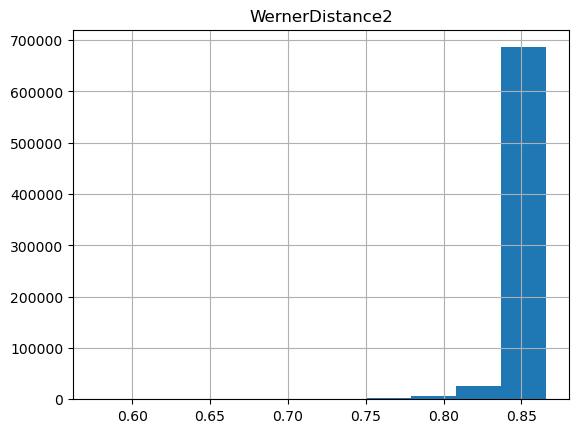

In [54]:
allcomplex.Measures.hist('WernerDistance2')

array([[<Axes: title={'center': 'FidelityWerner'}>]], dtype=object)

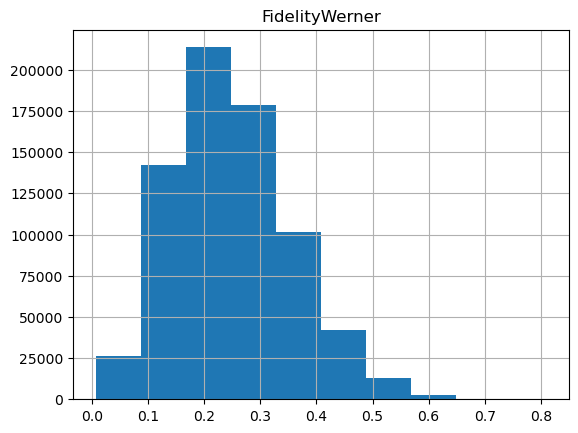

In [52]:
allcomplex.Measures.hist('FidelityWerner')

In [37]:
piom4=density_matrix(rho2(-pi/4,1))

In [53]:
min_dist_werner(0.5)

(0.816496580927726, 0.3333333333333333)

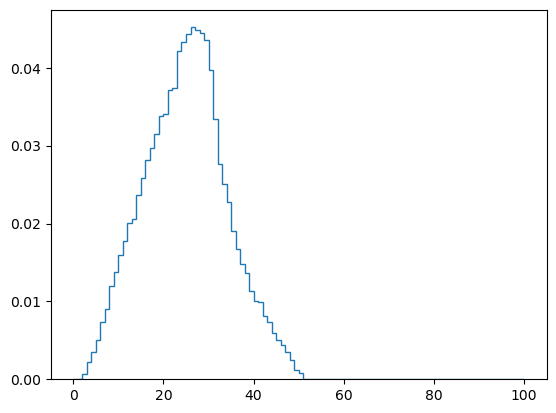

In [67]:
allcomplex.histogram(1)

In [ ]:
def unite_data(name):
    attribs =  ['Matrix', 'Measures', 'Bins', 'OptimalState', 'Rotation']
    for attrib in attribs:
        